# Homework 4

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn import model_selection
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('diabetes.csv')
print(data.shape)

(253680, 22)


In [ ]:
data.head()

In [ ]:
data.corr()

In [3]:
def normalization(d):
    dmax = max(d)
    dmin = min(d)
    return lambda x: (x-dmin)/(dmax-dmin)
to_normalize = ["BMI", "GeneralHealth", "MentalHealth","PhysicalHealth", "BiologicalSex","AgeBracket","EducationBracket","IncomeBracket","Zodiac" ]

for f in to_normalize:
    data[f] = data[f].apply(normalization(data[f]))
    
data.describe()

,Diabetes,HighBP,HighChol,BMI,Smoker,Stroke,Myocardial,PhysActivity,Fruit,Vegetables,...,NotAbleToAffordDoctor,GeneralHealth,MentalHealth,PhysicalHealth,HardToClimbStairs,BiologicalSex,AgeBracket,EducationBracket,IncomeBracket,Zodiac
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.190493,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,...,0.084177,0.377848,0.106159,0.141403,0.168224,0.440342,0.586010,0.810087,0.721982,0.500398
std,0.346294,0.494934,0.494210,0.076845,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,...,0.277654,0.267119,0.247095,0.290598,0.374066,0.496429,0.254518,0.197155,0.295878,0.313950
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.139535,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.416667,0.600000,0.571429,0.272727
50%,0.000000,0.000000,0.000000,0.174419,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.583333,0.800000,0.857143,0.545455
75%,0.000000,1.000000,1.000000,0.220930,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.500000,0.066667,0.100000,0.000000,1.000000,0.750000,1.000000,1.000000,0.818182
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.corr()

In [4]:
data = data.drop(['Zodiac', 'IncomeBracket', 'AgeBracket', 'EducationBracket', 'PhysActivity', 'Fruit'] , axis = 1)

In [14]:
data.shape

(253680, 16)

In [5]:
# Split the data.  DO NOT TOUCH THE TEST DATA FROM HERE ON!!
train_data, val_data = model_selection.train_test_split(data, test_size = 0.2) # 0.2 is 20% validation data.

# Split the features from the class labels.
X_train = train_data.drop('Diabetes', axis = 1) # We drop the target from the features.  
X_val  = val_data.drop('Diabetes', axis = 1)  # Note that this does not operate inplace.
 
y_train = train_data['Diabetes']
y_val  = val_data['Diabetes']

In [6]:
def test_model(X_trainVal, y_trainVal, model, results):
    print("Testing...")

    X_train = X_trainVal[0]
    X_val  = X_trainVal[1]
    
    y_train = y_trainVal[0]
    y_val  = y_trainVal[1]


    model.fit(X_train, y_train);

    pred = model.predict(X_val)
    y_score = model.decision_function(X_val)
    
    print(y_score.shape, y_val.shape)
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    print("y_score", y_score[:100])
    for i in range(1):
        fpr[i], tpr[i], _ = metrics.roc_curve(y_val, y_score)
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_val.ravel(), y_score.ravel())
    roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])

    accuracy = metrics.accuracy_score(y_val, pred) 
    #print("Accuracy = {:0.1f}%".format(accuracy * 100))
    results["Accuracies"].append((accuracy,"Diabetes"))

    # The matrix of predictions and true values for each class.
    conf_matrix = metrics.confusion_matrix(y_val, pred)
    #print("Confusion matrix = ")
    results["Confusion Matrix"].append((conf_matrix,"Diabetes"))

    # Precision score.
    precision = metrics.precision_score(y_val, pred)
    #print("Precision = {:0.1f}%".format(100 * precision))
    results["Precision"].append((precision,"Diabetes"))


    # Recall score.
    recall = metrics.recall_score(y_val, pred)
    #print("Recall    = {:0.1f}%".format(100 * recall))
    results["Recall"].append((recall,"Diabetes"))

    auc = roc_auc[0]
    #print("AUC = {:0.2f}".format(auc))
    results["AUC"].append((auc,"Diabetes"))
    
    print("Accuracies: ")
    for c in sorted(results["Accuracies"], reverse=True):
        print(c)
        
    print("Confusion Matrix: ")
    for c in results["Confusion Matrix"]:
        disp = metrics.ConfusionMatrixDisplay(confusion_matrix=c[0])
        disp.plot()
        plt.show()
        
    print("Precision: ")
    for c in sorted(results["Precision"], reverse=True):
        print(c)
        
    print("Recall: ")
    for c in sorted(results["Recall"], reverse=True):
        print(c)
        
    
    print("AUC: ")
    for c in sorted(results["AUC"], reverse=True):
        print(c)
        
    plt.figure()
    lw = 2
    plt.plot(
        fpr[0],
        tpr[0],
        color="darkorange",
        lw=lw,
        label="ROC curve (area = %0.2f)" % roc_auc[0],
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic example")
    plt.legend(loc="lower right")
    plt.show()

# Question 1

Testing...
(50736,) (50736,)
y_score [ -2.05675365  -7.43276771  -2.36688751  -3.33730921  -0.24286476
  -4.75344375  -5.20377171  -8.7483099   -4.31742969  -6.99628177
  -8.01459167   0.50507031  -5.60472553  -2.96823959  -3.24425365
  -6.55540157  -3.24110105   2.42541839  -2.10191094  -3.61711511
  -5.49323959  -3.93411979  -2.74290157  -4.11002674  -1.39498993
  -6.24526771  -4.17049862  -2.49008698  -6.74076303  -2.96773091
  -4.80739289  -8.90195782  -6.35070278  -9.49594375  -4.74290157
  -7.45048525  -6.37060573  -7.62677709  -4.70205486  -1.72135539
  -2.43276771  -7.12161979  -3.55810573  -8.95951806  -3.93553542
  -7.61857761  -8.49594375  -8.15082327  -1.74245313  -5.56191094
  -2.62026771  -2.49222553  -5.24695782  -6.07044844   0.95011718
  -3.30742969  -6.62128177  -5.35911979  -1.66756355  -2.80607761
  -4.46816598  -0.15156616  -5.11722553  -3.60137882  -7.62128177
  -3.11891563 -10.07195782  -1.93141563  -1.4860408   -1.99628177
  -7.55810573  -3.86553542  -5.18209167

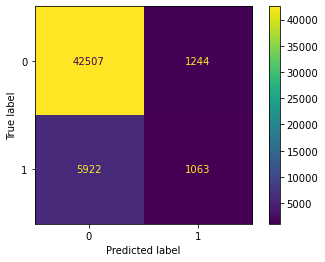

Precision: 
(0.46077156480277415, 'Diabetes')
Recall: 
(0.15218324982104509, 'Diabetes')
AUC: 
(0.7621546934433912, 'Diabetes')


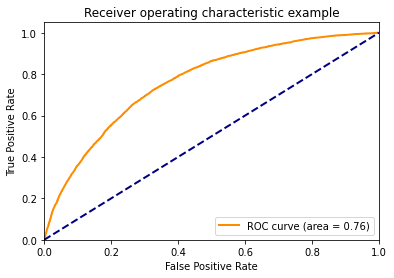

In [7]:
results = {"AUC":[],"Accuracies":[], "Confusion Matrix":[], "Precision":[], "Recall":[]}
drop_values = [["Diabetes"]]
clf = Perceptron(tol=1e-3, random_state=0)

test_model([X_train,X_val], [y_train, y_val], clf, results)

# Question 2

In [15]:
A = 1657
B = 1780
C = 5397
D = 41902
(A)/(2*(A+B))+(D)/(2*(D+C))
X_train.shape

(202944, 15)

mod  0 Sequential(
  (0): Linear(in_features=15, out_features=50, bias=True)
  (1): Linear(in_features=50, out_features=1, bias=True)
)


C:\Users\Alejamdro Zaccour\anaconda3\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


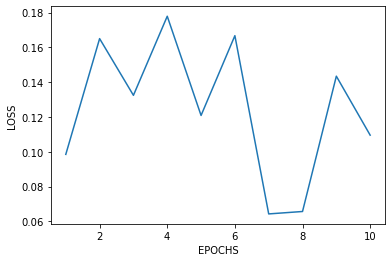

min loss 0.06424472481012344 in epoch 7
mod  1 Sequential(
  (0): Linear(in_features=15, out_features=2, bias=True)
  (1): ReLU()
  (2): Linear(in_features=2, out_features=2, bias=True)
  (3): ReLU()
  (4): Linear(in_features=2, out_features=1, bias=True)
)


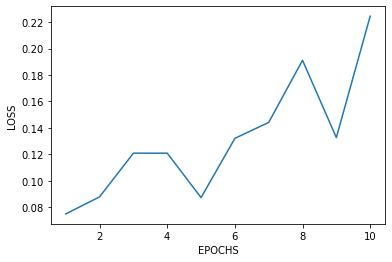

min loss 0.07496652007102966 in epoch 1
mod  2 Sequential(
  (0): Linear(in_features=15, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=5, bias=True)
  (3): ReLU()
  (4): Linear(in_features=5, out_features=1, bias=True)
)


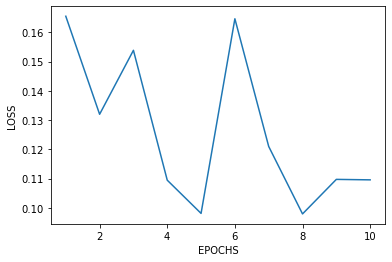

min loss 0.097898930311203 in epoch 8
mod  3 Sequential(
  (0): Linear(in_features=15, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=1, bias=True)
)


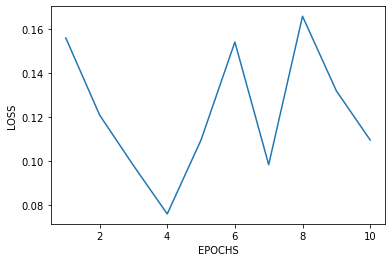

min loss 0.07583878934383392 in epoch 4
mod  4 Sequential(
  (0): Linear(in_features=15, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=20, bias=True)
  (3): ReLU()
  (4): Linear(in_features=20, out_features=1, bias=True)
)


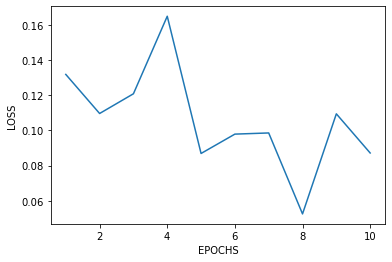

min loss 0.052509620785713196 in epoch 8
mod  5 Sequential(
  (0): Linear(in_features=15, out_features=50, bias=True)
  (1): ReLU()
  (2): Linear(in_features=50, out_features=50, bias=True)
  (3): ReLU()
  (4): Linear(in_features=50, out_features=1, bias=True)
)


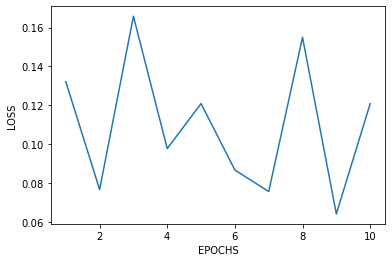

min loss 0.06423765420913696 in epoch 9
mod  6 Sequential(
  (0): Linear(in_features=15, out_features=2, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=2, out_features=2, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=2, out_features=1, bias=True)
)


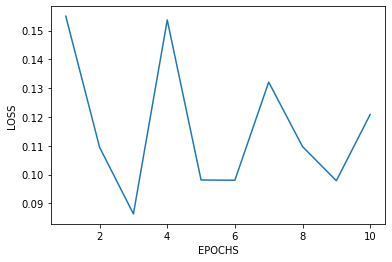

min loss 0.08634151518344879 in epoch 3
mod  7 Sequential(
  (0): Linear(in_features=15, out_features=5, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=5, out_features=5, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=5, out_features=1, bias=True)
)


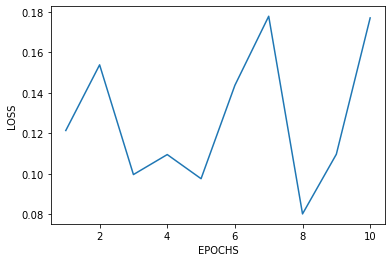

min loss 0.08012386411428452 in epoch 8
mod  8 Sequential(
  (0): Linear(in_features=15, out_features=10, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=10, out_features=1, bias=True)
)


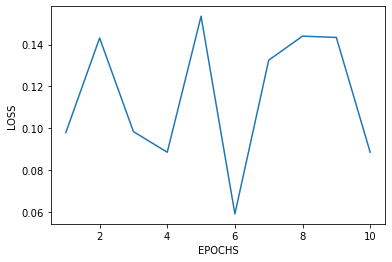

min loss 0.05909736454486847 in epoch 6
mod  9 Sequential(
  (0): Linear(in_features=15, out_features=20, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=20, out_features=20, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=20, out_features=1, bias=True)
)


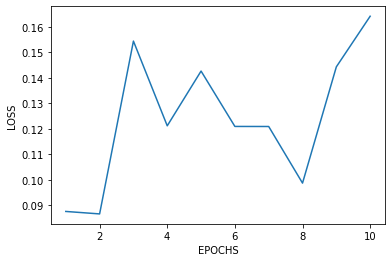

min loss 0.08665159344673157 in epoch 2
mod  10 Sequential(
  (0): Linear(in_features=15, out_features=50, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=50, out_features=50, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=50, out_features=1, bias=True)
)


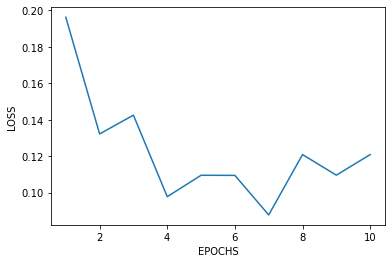

min loss 0.08777638524770737 in epoch 7


In [7]:
import torch
from torch import nn, optim
import math
import random
from IPython import display

#from plot_lib import plot_data, plot_model, set_default
#set_default()
seed = 1
random.seed(seed)
torch.manual_seed(seed)

D = X_train.shape[1]  # dimensions
C = 1  # num_classes

learning_rate = 1e-3
lambda_l2 = 1e-5


# Number of networks
n_networks = 11
hidden_layers = [2,5,10,20,50,2,5,10,20,50]
models = list()

# nn package also has different loss functions.
# we use MSE for a regression task
criterion = torch.nn.MSELoss()

for mod,H in enumerate(hidden_layers):
    # nn package to create our linear model
    # each Linear module has a weight and bias
    model = nn.Sequential(
        nn.Linear(D, H),
        nn.ReLU() if mod < n_networks // 2 else nn.Sigmoid(),
        nn.Linear(H, H),
        nn.ReLU() if mod < n_networks // 2 else nn.Sigmoid(),
        nn.Linear(H, C)
    )
    
    # Append models
    models.append(model)
model = nn.Sequential(
        nn.Linear(D, H),
        nn.Linear(H, C)
)
models.append(model)

X_train_p = torch.Tensor(X_train.values)
y_train_p = torch.Tensor(y_train.values)

X_val_p = torch.Tensor(X_val.values)
y_val_p = torch.Tensor(y_val.values)

from torch.utils.data import TensorDataset
train_load = torch.utils.data.DataLoader(TensorDataset(X_train_p,y_train_p),batch_size=64, shuffle=True)
test_load = torch.utils.data.DataLoader(TensorDataset(X_val_p,y_val_p),batch_size=64, shuffle=True)



for mod in range(n_networks):
    print("mod ", mod, model)
    # select the i-th model
    model = models[mod]
    
    epochs = []
    losses = []
    
    # while we could simply use the stochastic gradient descent optimized, we will use the ADAM optimizer
    # because of its robustness and speed
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2
    
    # Training loop
    for t in range(10):
        
        
        
        for batch_idx, (d, target) in enumerate(train_load):
            # send data to device, where the "device" is either a GPU if it exists or a CPU
            

            # Feed forward to get the logits
            y_pred = model(d)


            # Compute the loss and accuracy
            loss = criterion(y_pred, target)

            

            # zero the gradients before running
            # the backward pass.
            optimizer.zero_grad()

            # Backward pass to compute the g radient
            # of loss w.r.t our learnable params. 
            loss.backward()

            # Update params
            optimizer.step()
        
        #print(f"[MODEL]: {mod + 1}, [EPOCH]: {t}, [LOSS]: {loss.item():.6f}")
        losses.append(loss.item())
        epochs.append(t+1)
        
        #display.clear_output(wait=True)
    plt.plot(epochs,losses)
    plt.xlabel("EPOCHS")
    plt.ylabel("LOSS")
    plt.show()
    lossi, epochi = min([(losses[i],epochs[i]) for i in range(len(epochs)) ])
    print(f"min loss {lossi} in epoch {epochi}")

In [8]:
def calculate_auc(y_val, y_score):
    fpr, tpr, _ = metrics.roc_curve(y_val, y_score)
    roc_auc = metrics.auc(fpr, tpr)
    return fpr,tpr,roc_auc


def show_auc(models):
    for i,m in enumerate(models):
        y_score = m(X_val_p).detach().numpy().reshape(50736 )
        fpr,tpr,roc_auc = calculate_auc(y_val, y_score)
        plt.figure()
        lw = 2
        plt.plot(
            fpr,
            tpr,
            color="darkorange",
            lw=lw,
            label="ROC curve (area = %0.2f)" % roc_auc,
        )
        plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC model:{i}")
        plt.legend(loc="lower right")
        plt.show()

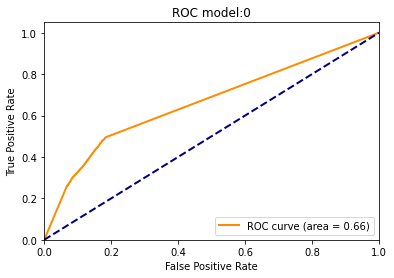

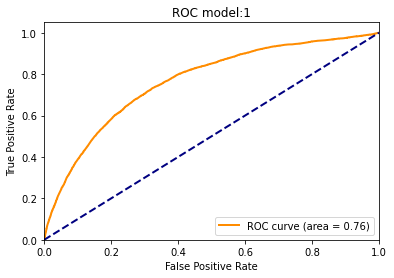

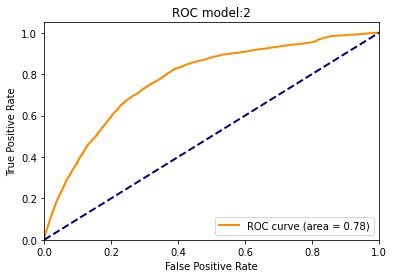

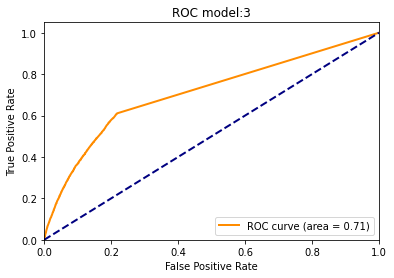

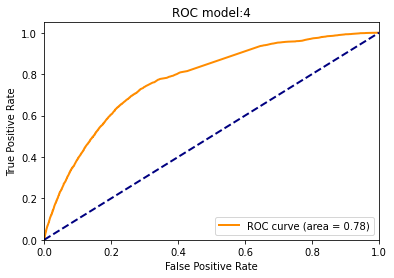

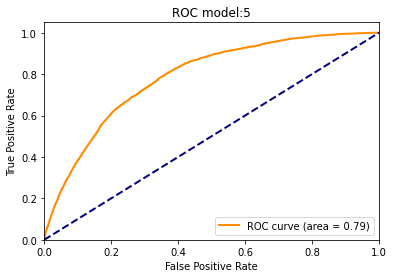

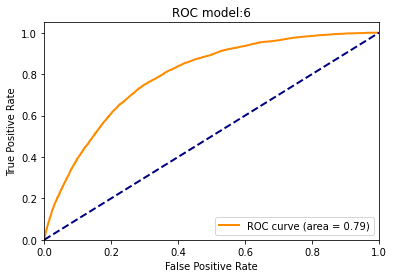

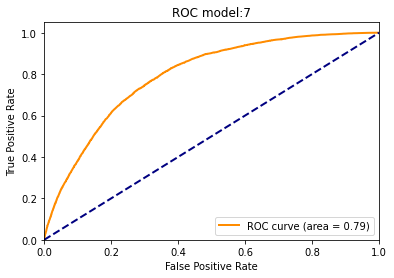

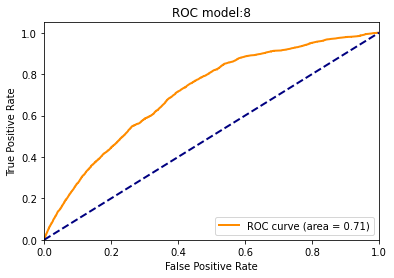

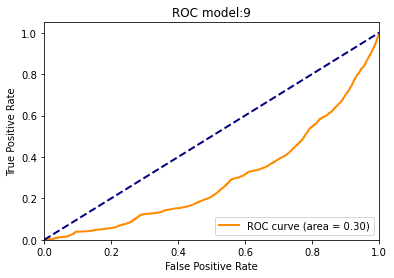

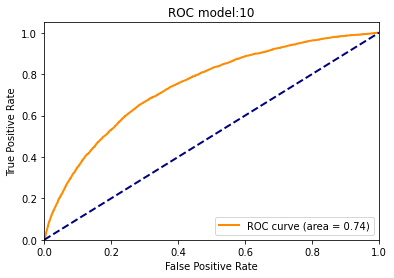

In [9]:
show_auc(models)

# Question 3

Model: Sequential(
  (0): Linear(in_features=15, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=5, bias=True)
  (3): ReLU()
  (4): Linear(in_features=5, out_features=5, bias=True)
  (5): ReLU()
  (6): Linear(in_features=5, out_features=5, bias=True)
  (7): ReLU()
  (8): Linear(in_features=5, out_features=5, bias=True)
  (9): ReLU()
  (10): Linear(in_features=5, out_features=1, bias=True)
)


C:\Users\Alejamdro Zaccour\anaconda3\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[EPOCH]: 0, [LOSS]: 0.097803
[EPOCH]: 1, [LOSS]: 0.132254
[EPOCH]: 2, [LOSS]: 0.098203
[EPOCH]: 3, [LOSS]: 0.131959
[EPOCH]: 4, [LOSS]: 0.098321
[EPOCH]: 5, [LOSS]: 0.132217
[EPOCH]: 6, [LOSS]: 0.065430
[EPOCH]: 7, [LOSS]: 0.086455
[EPOCH]: 8, [LOSS]: 0.098577
[EPOCH]: 9, [LOSS]: 0.109471
[EPOCH]: 10, [LOSS]: 0.199076
[EPOCH]: 11, [LOSS]: 0.120852
[EPOCH]: 12, [LOSS]: 0.120870
[EPOCH]: 13, [LOSS]: 0.086674
[EPOCH]: 14, [LOSS]: 0.109489
[EPOCH]: 15, [LOSS]: 0.155610
[EPOCH]: 16, [LOSS]: 0.109483
[EPOCH]: 17, [LOSS]: 0.168044
[EPOCH]: 18, [LOSS]: 0.177345
[EPOCH]: 19, [LOSS]: 0.120852
[EPOCH]: 20, [LOSS]: 0.121014
[EPOCH]: 21, [LOSS]: 0.075580
[EPOCH]: 22, [LOSS]: 0.098374
[EPOCH]: 23, [LOSS]: 0.109623
[EPOCH]: 24, [LOSS]: 0.120850
[EPOCH]: 25, [LOSS]: 0.109484
[EPOCH]: 26, [LOSS]: 0.075731
[EPOCH]: 27, [LOSS]: 0.109645
[EPOCH]: 28, [LOSS]: 0.120862
[EPOCH]: 29, [LOSS]: 0.120853
[EPOCH]: 30, [LOSS]: 0.120850
[EPOCH]: 31, [LOSS]: 0.098303
[EPOCH]: 32, [LOSS]: 0.154040
[EPOCH]: 33, [LOSS]:

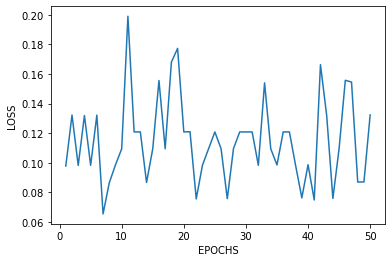

min loss 0.06543039530515671 in epoch 7


In [11]:
import torch
from torch import nn, optim
import math
import random
from IPython import display

#from plot_lib import plot_data, plot_model, set_default
#set_default()
seed = 1
random.seed(seed)
torch.manual_seed(seed)

D = X_train.shape[1]  # dimensions
C = 1  # num_classes

learning_rate = 1e-3
lambda_l2 = 1e-5

ac = nn.ReLU()
hl = 4
H= 5 #hidden units

X_train_p = torch.Tensor(X_train.values)
y_train_p = torch.Tensor(y_train.values)

X_val_p = torch.Tensor(X_val.values)
y_val_p = torch.Tensor(y_val.values)

from torch.utils.data import TensorDataset
train_load = torch.utils.data.DataLoader(TensorDataset(X_train_p,y_train_p),batch_size=64, shuffle=True)
test_load = torch.utils.data.DataLoader(TensorDataset(X_val_p,y_val_p),batch_size=64, shuffle=True)

# nn package also has different loss functions.
# we use MSE for a regression task
criterion = torch.nn.MSELoss()

HL = []
for i in range(hl):
    HL.append(nn.Linear(H,H))
    HL.append(ac)

model = nn.Sequential(
        nn.Linear(D, H),
        ac,
        *HL,
        nn.Linear(H, C)
    )

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

print("Model:", model)
losses = []
epochs = []
# Training loop
for t in range(50):
    for batch_idx, (data, target) in enumerate(train_load):
        # send data to device, where the "device" is either a GPU if it exists or a CPU


        # Feed forward to get the logits
        y_pred = model(data)


        # Compute the loss and accuracy
        loss = criterion(y_pred, target)



        # zero the gradients before running
        # the backward pass.
        optimizer.zero_grad()

        # Backward pass to compute the g radient
        # of loss w.r.t our learnable params. 
        loss.backward()

        # Update params
        optimizer.step()
    print(f"[EPOCH]: {t}, [LOSS]: {loss.item():.6f}")
    losses.append(loss.item())
    epochs.append(t+1)
plt.plot(epochs,losses)
plt.xlabel("EPOCHS")
plt.ylabel("LOSS")
plt.show()
lossi, epochi = min([(losses[i],epochs[i]) for i in range(len(epochs)) ])
print(f"min loss {lossi} in epoch {epochi}")

    #display.clear_output(wait=True)

# Question 4

mod  0 Sequential(
  (0): Linear(in_features=15, out_features=50, bias=True)
  (1): Linear(in_features=50, out_features=1, bias=True)
)


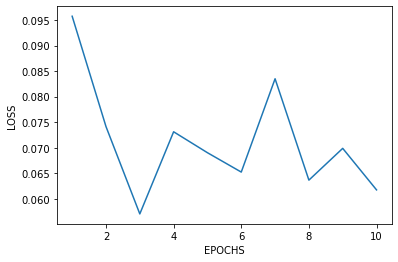

min loss 0.057038020342588425 in epoch 3
mod  1 Sequential(
  (0): Linear(in_features=15, out_features=2, bias=True)
  (1): ReLU()
  (2): Linear(in_features=2, out_features=2, bias=True)
  (3): ReLU()
  (4): Linear(in_features=2, out_features=1, bias=True)
)


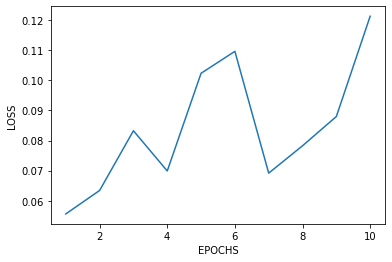

min loss 0.055634770542383194 in epoch 1
mod  2 Sequential(
  (0): Linear(in_features=15, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=5, bias=True)
  (3): ReLU()
  (4): Linear(in_features=5, out_features=1, bias=True)
)


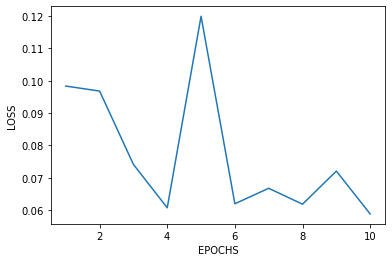

min loss 0.058855362236499786 in epoch 10
mod  3 Sequential(
  (0): Linear(in_features=15, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=1, bias=True)
)


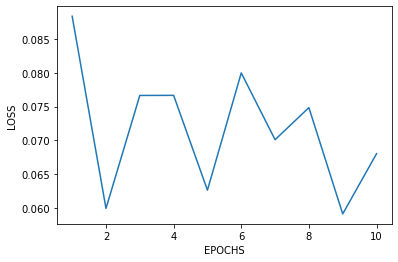

min loss 0.05913912132382393 in epoch 9
mod  4 Sequential(
  (0): Linear(in_features=15, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=20, bias=True)
  (3): ReLU()
  (4): Linear(in_features=20, out_features=1, bias=True)
)


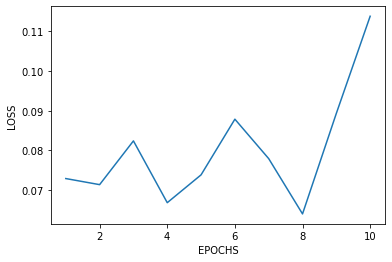

min loss 0.0640094131231308 in epoch 8
mod  5 Sequential(
  (0): Linear(in_features=15, out_features=50, bias=True)
  (1): ReLU()
  (2): Linear(in_features=50, out_features=50, bias=True)
  (3): ReLU()
  (4): Linear(in_features=50, out_features=1, bias=True)
)


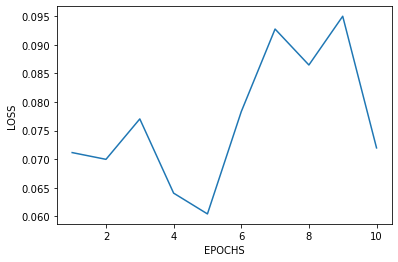

min loss 0.06041114032268524 in epoch 5
mod  6 Sequential(
  (0): Linear(in_features=15, out_features=2, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=2, out_features=2, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=2, out_features=1, bias=True)
)


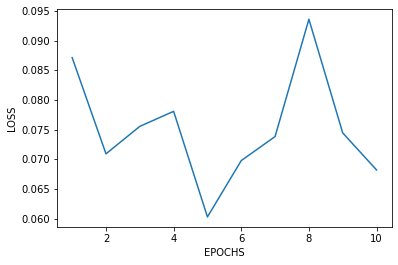

min loss 0.06028638035058975 in epoch 5
mod  7 Sequential(
  (0): Linear(in_features=15, out_features=5, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=5, out_features=5, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=5, out_features=1, bias=True)
)


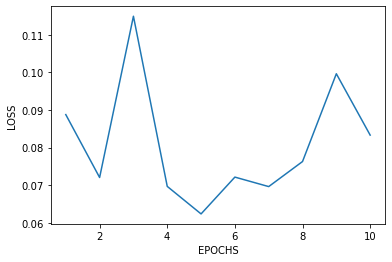

min loss 0.062365565448999405 in epoch 5
mod  8 Sequential(
  (0): Linear(in_features=15, out_features=10, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=10, out_features=1, bias=True)
)


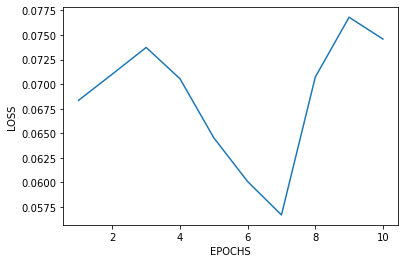

min loss 0.056703101843595505 in epoch 7
mod  9 Sequential(
  (0): Linear(in_features=15, out_features=20, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=20, out_features=20, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=20, out_features=1, bias=True)
)


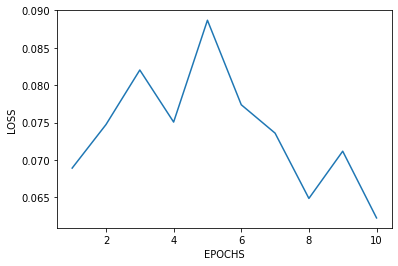

min loss 0.062243975698947906 in epoch 10


In [21]:
# Split the features from the class labels.
X_train = train_data.drop('BMI', axis = 1) # We drop the target from the features.  
X_val  = val_data.drop('BMI', axis = 1)  # Note that this does not operate inplace.
 
y_train = train_data['BMI']
y_val  = val_data['BMI']


#from plot_lib import plot_data, plot_model, set_default
#set_default()
seed = 1
random.seed(seed)
torch.manual_seed(seed)

D = X_train.shape[1]  # dimensions
C = 1  # num_classes

learning_rate = 1e-3
lambda_l2 = 1e-5


# Number of networks
n_networks = 10
hidden_layers = [2,5,10,20,50,2,5,10,20,50]
models = list()
H = 10

# nn package also has different loss functions.
# we use MSE for a regression task
criterion = torch.nn.MSELoss()

for mod,H in enumerate(hidden_layers):
    # nn package to create our linear model
    # each Linear module has a weight and bias
    model = nn.Sequential(
        nn.Linear(D, H),
        nn.ReLU() if mod < n_networks // 2 else nn.Sigmoid(),
        nn.Linear(H, H),
        nn.ReLU() if mod < n_networks // 2 else nn.Sigmoid(),
        nn.Linear(H, C)
    )
    
    # Append models
    models.append(model)
model = nn.Sequential(
        nn.Linear(D, H),
        nn.Linear(H, C)
)
models.append(model)

X_train_p = torch.Tensor(X_train.values)
y_train_p = torch.Tensor(y_train.values)

X_val_p = torch.Tensor(X_val.values)
y_val_p = torch.Tensor(y_val.values)

from torch.utils.data import TensorDataset
train_load = torch.utils.data.DataLoader(TensorDataset(X_train_p,y_train_p),batch_size=64, shuffle=True)
test_load = torch.utils.data.DataLoader(TensorDataset(X_val_p,y_val_p),batch_size=64, shuffle=True)



for mod in range(n_networks):
    print("mod ", mod, model)
    # select the i-th model
    model = models[mod]
    
    epochs = []
    losses = []
    
    # while we could simply use the stochastic gradient descent optimized, we will use the ADAM optimizer
    # because of its robustness and speed
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2
    
    # Training loop
    for t in range(10):
        
        
        
        for batch_idx, (d, target) in enumerate(train_load):
            # send data to device, where the "device" is either a GPU if it exists or a CPU
            

            # Feed forward to get the logits
            y_pred = model(d)


            # Compute the loss and accuracy
            loss = torch.sqrt(criterion(y_pred, target))

            

            # zero the gradients before running
            # the backward pass.
            optimizer.zero_grad()

            # Backward pass to compute the g radient
            # of loss w.r.t our learnable params. 
            loss.backward()

            # Update params
            optimizer.step()
        
        #print(f"[MODEL]: {mod + 1}, [EPOCH]: {t}, [LOSS]: {loss.item():.6f}")
        losses.append(loss.item())
        epochs.append(t+1)
        
        #display.clear_output(wait=True)
    plt.plot(epochs,losses)
    plt.xlabel("EPOCHS")
    plt.ylabel("LOSS")
    plt.show()
    lossi, epochi = min([(losses[i],epochs[i]) for i in range(len(epochs)) ])
    print(f"min loss {lossi} in epoch {epochi}")

# Question 5

Model: Sequential(
  (0): Linear(in_features=15, out_features=2, bias=True)
  (1): ReLU()
  (2): Linear(in_features=2, out_features=2, bias=True)
  (3): ReLU()
  (4): Linear(in_features=2, out_features=2, bias=True)
  (5): ReLU()
  (6): Linear(in_features=2, out_features=2, bias=True)
  (7): ReLU()
  (8): Linear(in_features=2, out_features=2, bias=True)
  (9): ReLU()
  (10): Linear(in_features=2, out_features=2, bias=True)
  (11): ReLU()
  (12): Linear(in_features=2, out_features=2, bias=True)
  (13): ReLU()
  (14): Linear(in_features=2, out_features=2, bias=True)
  (15): ReLU()
  (16): Linear(in_features=2, out_features=2, bias=True)
  (17): ReLU()
  (18): Linear(in_features=2, out_features=2, bias=True)
  (19): ReLU()
  (20): Linear(in_features=2, out_features=2, bias=True)
  (21): ReLU()
  (22): Linear(in_features=2, out_features=1, bias=True)
)
[EPOCH]: 0, [LOSS]: 0.087652
[EPOCH]: 1, [LOSS]: 0.076111
[EPOCH]: 2, [LOSS]: 0.068817
[EPOCH]: 3, [LOSS]: 0.089092
[EPOCH]: 4, [LOSS]: 0.0

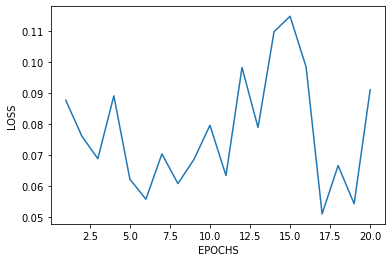

min loss 0.0510086826980114 in epoch 17


In [29]:
ac = nn.ReLU() #based on results of question 4
hl = 10
H= 2 #hidden units, #based on results of question 4

HL = []
for i in range(hl):
    HL.append(nn.Linear(H,H))
    HL.append(ac)

model = nn.Sequential(
        nn.Linear(D, H),
        ac,
        *HL,
        nn.Linear(H, C)
    )

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

print("Model:", model)
losses = []
epochs = []
# Training loop
for t in range(20): #based on results of question 4
    for batch_idx, (data, target) in enumerate(train_load):
        # send data to device, where the "device" is either a GPU if it exists or a CPU


        # Feed forward to get the logits
        y_pred = model(data)


        # Compute the loss and accuracy
        loss = torch.sqrt(criterion(y_pred, target))



        # zero the gradients before running
        # the backward pass.
        optimizer.zero_grad()

        # Backward pass to compute the g radient
        # of loss w.r.t our learnable params. 
        loss.backward()

        # Update params
        optimizer.step()
    print(f"[EPOCH]: {t}, [LOSS]: {loss.item():.6f}")
    losses.append(loss.item())
    epochs.append(t+1)
plt.plot(epochs,losses)
plt.xlabel("EPOCHS")
plt.ylabel("LOSS")
plt.show()
lossi, epochi = min([(losses[i],epochs[i]) for i in range(len(epochs)) ])
print(f"min loss {lossi} in epoch {epochi}")

    #display.clear_output(wait=True)